In [30]:
import example_from_book.thinkdsp as tk

## Упражнение 1.2

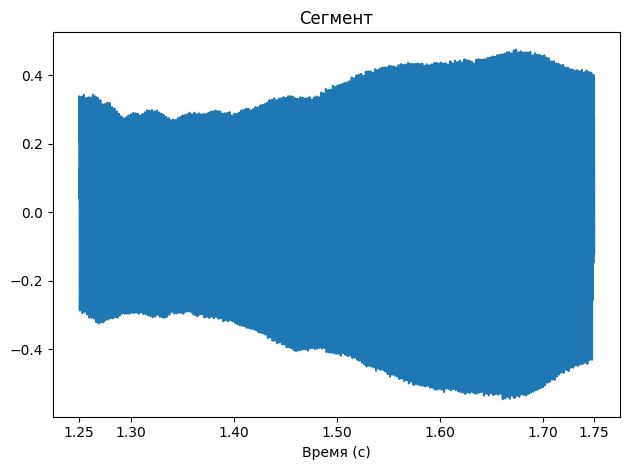

In [44]:
sound = tk.read_wave("lab1.wav")
segment = sound.segment(start=1.25, duration=0.5)

segment.plot()
tk.decorate(
    title="Сегмент",
    xlabel="Время (с)",
    xticks=[i / 10 for i in range(13, 18)] + [1.25, 1.75]
)

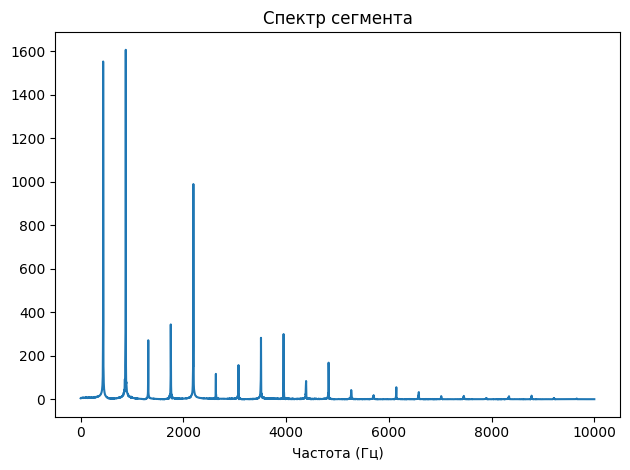

In [45]:
spec = segment.make_spectrum()
spec.plot(high=10_000)
tk.decorate(
    title="Спектр сегмента",
    xlabel="Частота (Гц)"
)

### Фильтрация low_pass

In [33]:
spec_low = spec.copy()
spec_low.low_pass(cutoff=1000, factor=0.01)

wave_low = spec_low.make_wave()

wave_low.make_audio()

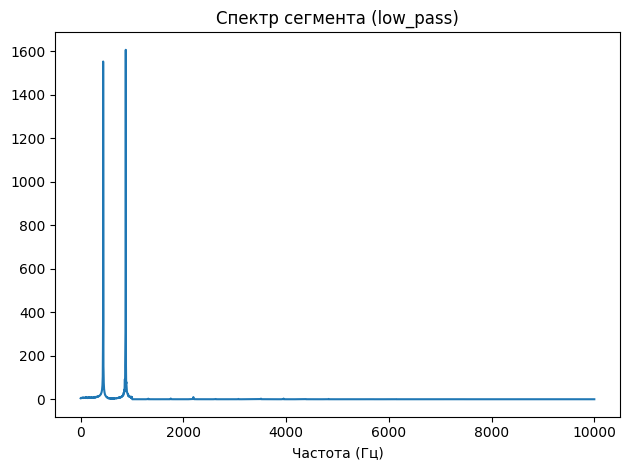

In [46]:
spec_low.plot(high=10_000)
tk.decorate(
    title="Спектр сегмента (low_pass)",
    xlabel="Частота (Гц)"
)

### Фильтрация high_pass

In [35]:
spec_high = spec.copy()
spec_high.high_pass(cutoff=1000, factor=0.01)

wave_high = spec_high.make_wave()

wave_high.make_audio()

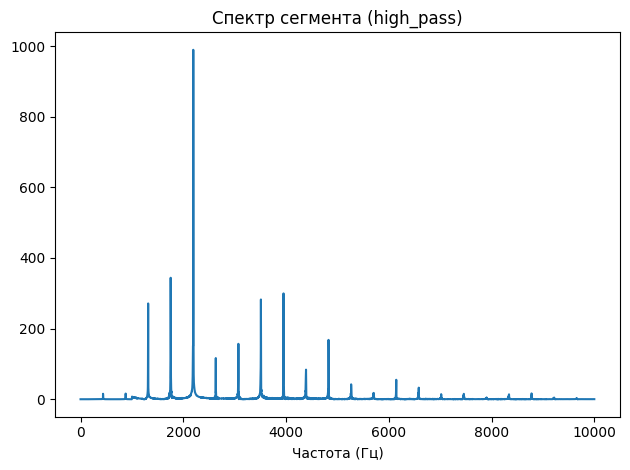

In [47]:
spec_high.plot(high=10_000)
tk.decorate(
    title="Спектр сегмента (high_pass)",
    xlabel="Частота (Гц)"
)

### Фильтрация bond_stop

In [37]:
spec_bond = spec.copy()
spec_bond.band_stop(low_cutoff=1000, high_cutoff=2000, factor=0.01)

wave_bond = spec_bond.make_wave()

wave_bond.make_audio()

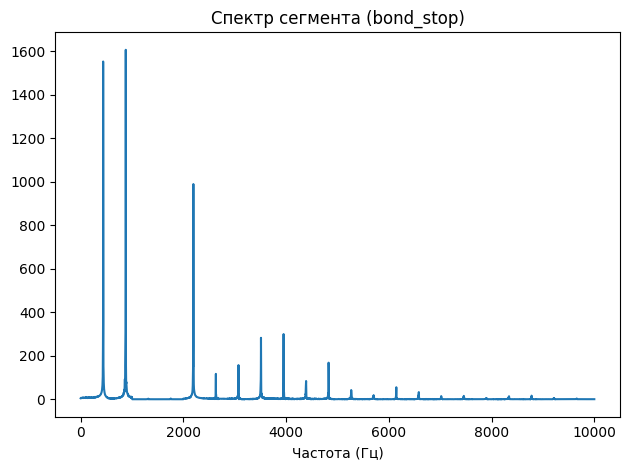

In [48]:
spec_bond.plot(high=10_000)
tk.decorate(
    title="Спектр сегмента (bond_stop)",
    xlabel="Частота (Гц)"
)

## Упражнение 1.3

In [51]:
sin_440 = tk.SinSignal(freq=440, amp=0.5)
cos_600 = tk.CosSignal(freq=600, amp=0.3)

mix = sin_440 + cos_600

wave = mix.make_wave(duration=0.5, framerate=16000)

wave.make_audio()

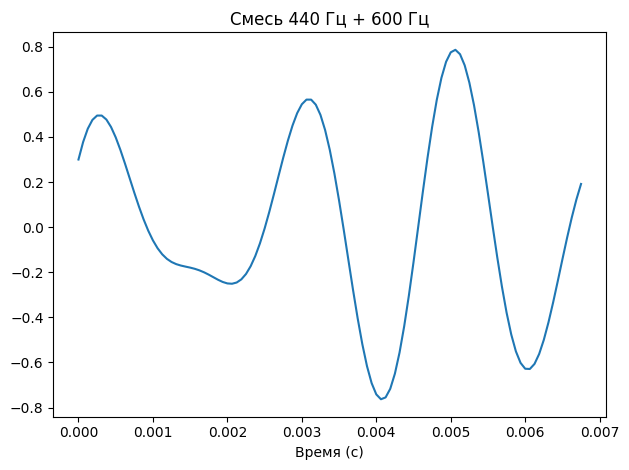

In [52]:
segment = wave.segment(start=0, duration=mix.period * 3)
segment.plot()
tk.decorate(
    title="Смесь 440 Гц + 600 Гц",
    xlabel="Время (с)"
)

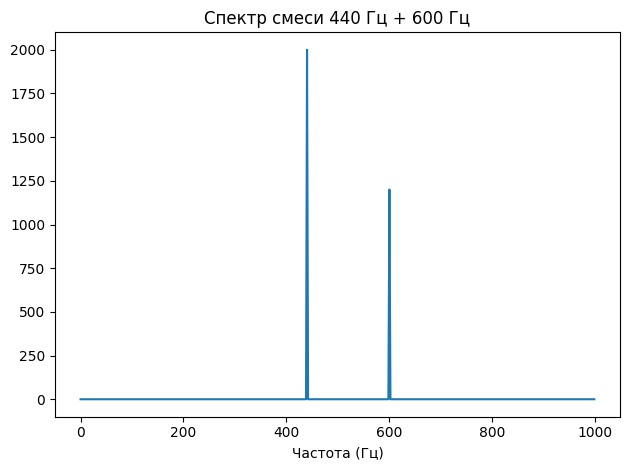

In [50]:
spec = wave.make_spectrum()
spec.plot(high=1000)
tk.decorate(
    title="Спектр смеси 440 Гц + 600 Гц",
    xlabel="Частота (Гц)"
)

In [53]:
sin_880 = tk.SinSignal(freq=880, amp=0.2)

mix = sin_440 + sin_880

wave = mix.make_wave(duration=0.5, framerate=16000)

wave.make_audio()

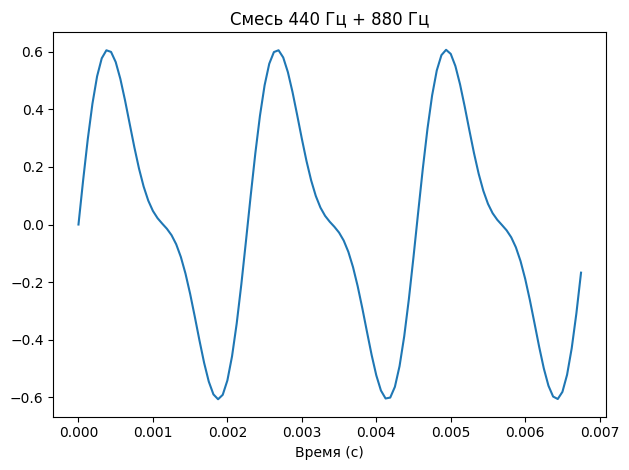

In [54]:
segment = wave.segment(start=0, duration=mix.period * 3)
segment.plot()
tk.decorate(
    title="Смесь 440 Гц + 880 Гц",
    xlabel="Время (с)"
)

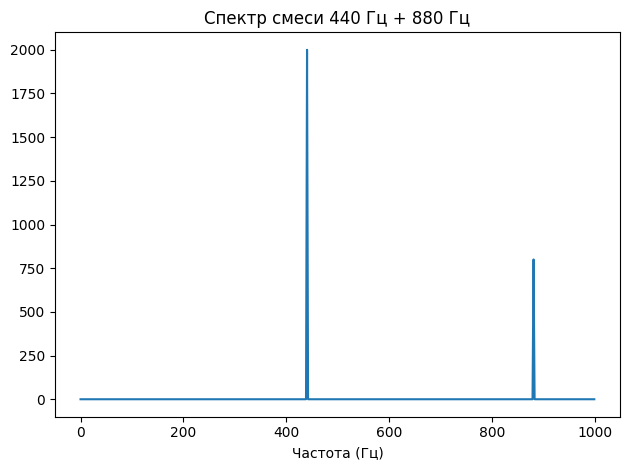

In [55]:
spec = wave.make_spectrum()
spec.plot(high=1000)
tk.decorate(
    title="Спектр смеси 440 Гц + 880 Гц",
    xlabel="Частота (Гц)"
)

## Упражнение 1.4

In [56]:
def stretch(wave_, factor):
    wave_.ts *= factor
    wave_.framerate /= factor

In [59]:
signal = tk.SinSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=16000)

print('Длительность:', wave.duration)
print('Частота кадров:', wave.framerate)

stretch(wave, 2.0)

print('\nНовая длительность:', wave.duration)
print('Новая частота кадров:', wave.framerate)

wave.make_audio()

Длительность: 1.0
Частота кадров: 16000

Новая длительность: 2.0
Новая частота кадров: 8000.0
